# **Praktikum 11 - K-Means Clustering**

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## **Load Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/1.KULIAH/Semester 7/Machine Learning/praktikum05/data/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


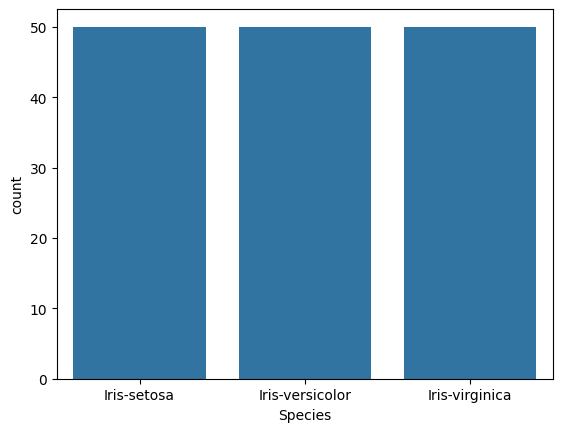

In [9]:
# Mengecek Variasi Spesiesnya
sns.countplot(x="Species", data=df)
plt.show()

## **Pemilihan Fitur**

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["SpeciesEncoded"] = le.fit_transform(df["Species"])

In [11]:
# Fitur untuk clustering
X = df.drop(["Id","Species","SpeciesEncoded"], axis=1)

In [12]:
X[7:15]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1
10,5.4,3.7,1.5,0.2
11,4.8,3.4,1.6,0.2
12,4.8,3.0,1.4,0.1
13,4.3,3.0,1.1,0.1
14,5.8,4.0,1.2,0.2


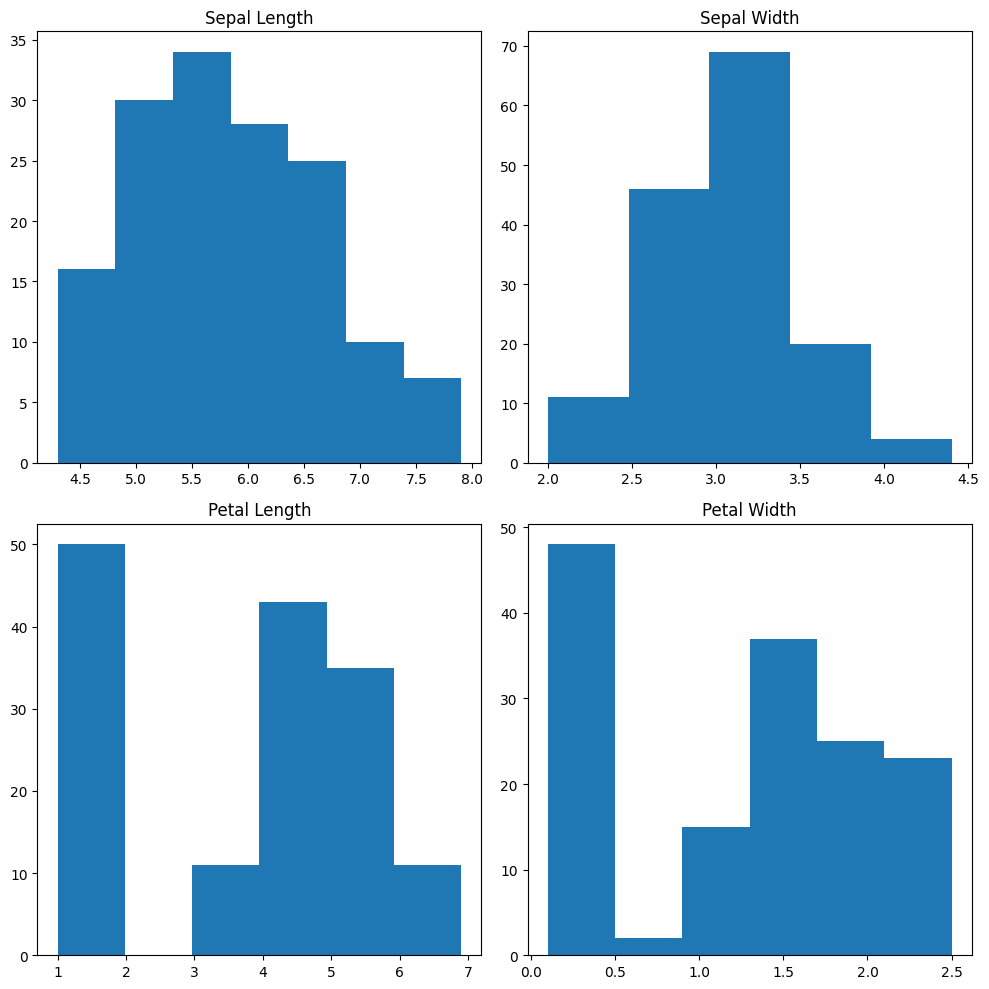

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Histogram 1 : Sepal Length
axes[0, 0].set_title("Sepal Length")
axes[0, 0].hist(X["SepalLengthCm"], bins=7)

# Histogram 2 : Sepal Width
axes[0, 1].set_title("Sepal Width")
axes[0, 1].hist(X["SepalWidthCm"], bins=5)

# Histogram 1 : Petal Length
axes[1, 0].set_title("Petal Length")
axes[1, 0].hist(X["PetalLengthCm"], bins=6)

# Histogram 1 : Petal Width
axes[1, 1].set_title("Petal Width")
axes[1, 1].hist(X["PetalWidthCm"], bins=6)

plt.tight_layout()
plt.show()

## **Normalisasi Data**

In [14]:
# ScandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Re-initialite X from the originial Dataframe 'df'
# This ensires X is a Dataframe with named columns for indxing before scalling
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Now apply the scaling
X= scaler.fit_transform(X)
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

## **Menentukan Jumlah Cluster (K) dengan Elbow Method**

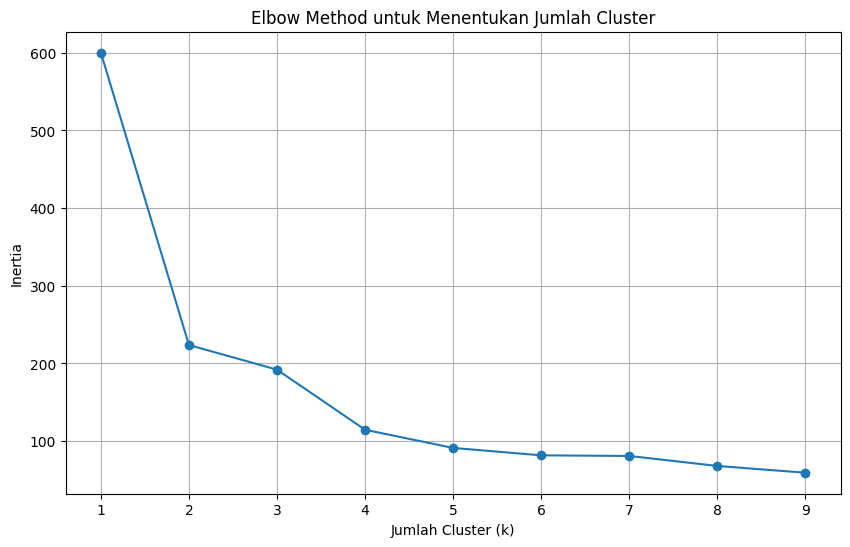

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_list = []
K_range = range(1, 10)

for k in K_range:
  km = KMeans(n_clusters=k, random_state=42, n_init='auto') # Changed n_Clusters to n_clusters and added n_init
  km.fit(X)
  inertia_list.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia_list, marker='o')
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

## **Modelling**

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    n_clusters=3,    #Karena daatset Iris ada 3 spesies
    init="k-means++",
    random_state=42,
)

In [17]:
df["Cluster"] = kmeans.fit_predict(X)
print("Cluster ditemukan:", df["Cluster"].unique())

Cluster ditemukan: [1 2 0]


## **Evaluasi**

In [19]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, df["Cluster"])
print("\n==== SILHOUTTE SCORE ====")
print("Silhoutte Score:", sil_score)


==== SILHOUTTE SCORE ====
Silhoutte Score: 0.4787241921049546


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
print("\n==== CONFUSION MATRIX ====")
cm = confusion_matrix(df["SpeciesEncoded"], df["Cluster"])
print(cm)


==== CONFUSION MATRIX ====
[[ 0 32 18]
 [46  0  4]
 [50  0  0]]


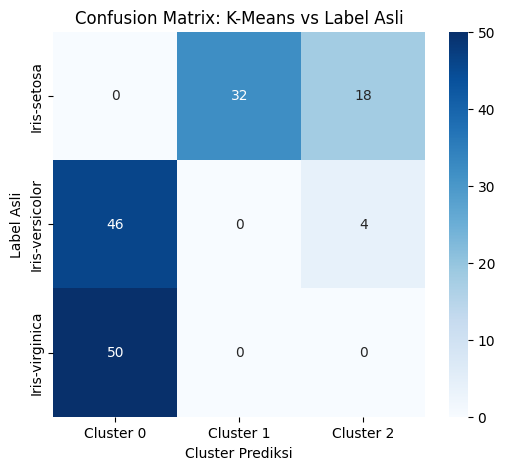

In [21]:
# visualisasi confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"],
    yticklabels=le.classes_
)

plt.title("Confusion Matrix: K-Means vs Label Asli")
plt.xlabel("Cluster Prediksi")
plt.ylabel("Label Asli")
plt.show()

## **Visualisasi**

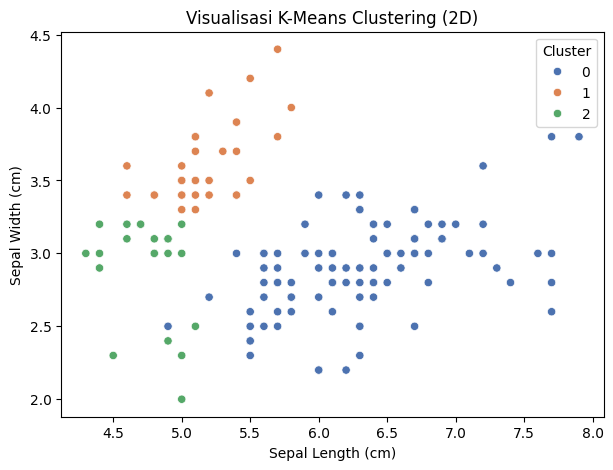

In [22]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df["SepalLengthCm"],
    y=df["SepalWidthCm"],
    hue=df["Cluster"],
    palette="deep"
)
plt.title("Visualisasi K-Means Clustering (2D)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

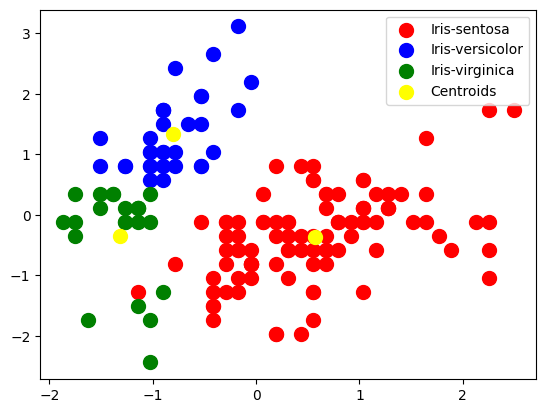

In [23]:
# Visualising the clusters
plt.scatter(X[df["Cluster"] == 0, 0], X[df["Cluster"] == 0, 1], s = 100, c = 'red', label = 'Iris-sentosa')
plt.scatter(X[df["Cluster"] == 1, 0], X[df["Cluster"] == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(X[df["Cluster"] == 2, 0], X[df["Cluster"] == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

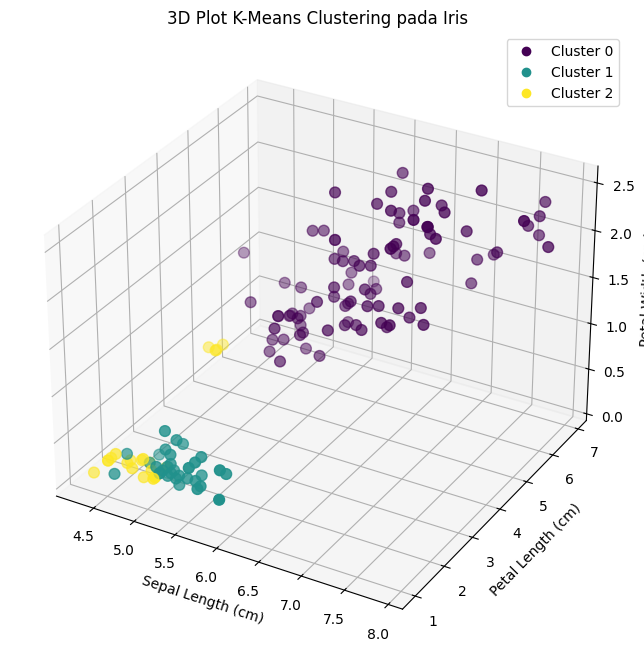

In [24]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df["SepalLengthCm"],
    df["PetalLengthCm"],
    df["PetalWidthCm"],
    c=df["Cluster"],
    s=60
)

ax.set_title("3D Plot K-Means Clustering pada Iris")
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Petal Length (cm)")
ax.set_zlabel("Petal Width (cm)")

# Legend cluster
legend_labels = [f"Cluster {i}" for i in range(3)]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()